# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?

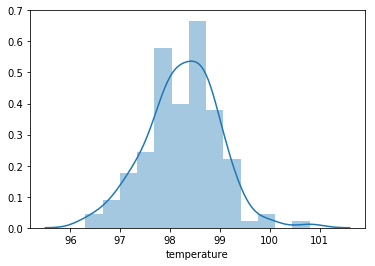

In [6]:
_ = sns.distplot(df['temperature'])

Plotting the empirical CDF suggests that the distribution is normal: 

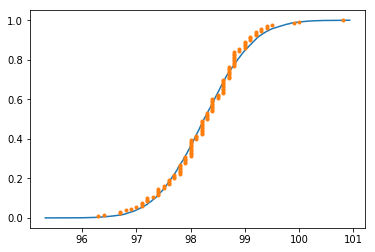

In [7]:
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
samples = np.random.normal(mu, sigma, 10000)

x_theor = np.sort(samples)
n = len(samples)
y_theor = np.arange(1, n+1)/n

x = np.sort(df['temperature'])
y = np.arange(1,131)/130

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x,y, marker='.', linestyle='none')

plt.show()

Now we try the combined D'Agostino and Pearson tests provided by scipy.stats. 

The null hypothesis is: The temperature sample comes from a normal distribution. 

Since the p-value is >.05, we fail to reject the null hypothesis. 

In [8]:
from scipy.stats import normaltest
normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

## 2. Is the sample size large? Are the observations independent?

In [9]:
df.shape

(130, 3)

130>= 30, so the sample size itself is large enough to apply CLT. 

Temperature observations in individuals are independent assuming good methodology. [This link](https://ww2.amstat.org/publications/jse/v4n2/datasets.shoemaker.html) explains how the data was obtained: it was back-engineered from a histogram. Each of the 130 samples is supposed to correspond to the temperature of a certain individual, so the observations are independent. 

## 3. Is the true population mean really 98.6 degrees F? 

### First method: bootstrap

In [10]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [11]:
bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)

In [12]:
np.mean(bs_replicates)

98.24947715384616

In [13]:
np.percentile(bs_replicates,[2.5, 97.5])

array([98.12538462, 98.37230769])

The bootstrap method suggests that the population mean is closer to 98.25 degrees F

### Second method: Frequentist statistical testing. 

A t-test is appropriate here because we want to test the hypothesis that the population mean is 98.6 degrees F, but we don't know the population variance. 

We want to evaluate the population mean so we want to use a one-sample test. 

We'll carry out a one-sample t-test: the null hypothesis is that the sample mean is 98.6 F. 

In [14]:
import scipy
ttest_result = scipy.stats.ttest_1samp(df.temperature, 98.6)

In [15]:
print(ttest_result)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


As the p-value is 2.41E-07, we reject the null hypothesis. 

#### Let's estimate the standard deviation and try a z-test. 
Our null hypothesis is that the mean of our sample is 98.6 F. We'll reject if |Z| > 1.96 for a 95% confidence interval. 

We estimate the population standard deviation by the standard deviation of the sample. 

In [16]:
xbar = np.mean(df.temperature)
m_0 = 98.6
sigma = np.std(df.temperature)
z_score = (xbar-m_0)/sigma

In [17]:
print(z_score)

-0.48027041116080765


In this case, we have |Z| = .48 < 1.96. So we fail to reject the null hypothesis. 

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
In both cases, the null hypothesis is that the mean of this small sample is 98.6 

In [18]:
sample = df.sample(10)

In [19]:
sample.temperature.describe()

count    10.000000
mean     98.380000
std       0.686052
min      96.700000
25%      98.225000
50%      98.500000
75%      98.750000
max      99.300000
Name: temperature, dtype: float64

In [20]:
ttest_result = scipy.stats.ttest_1samp(sample.temperature, 98.6)
print(ttest_result)

Ttest_1sampResult(statistic=-1.0140653883738853, pvalue=0.3370360568127233)


If our threshold value is p=.05, we do not reject the null hypothesis here. However, we note that we COULD reject the null hypothesis with an 85% confidence interval here.. 

In [21]:
xbar = np.mean(sample.temperature)
m_0 = 98.5 
sigma = np.std(sample.temperature)
z_score = (xbar-m_0)/sigma
print(z_score)

-0.1843755251589081


We do not reject the null hypothesis. 

It's more correct to use a t-test here since we have such a small sample size. Generally the Z-test is only applied when n > 30

## 5. At what temperature should we consider someone's temperature to be "abnormal"? 

### Bootstrap method

In [28]:
bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)
print('The confidence interval is {}'.format(np.percentile(bs_replicates,[2.5, 97.5])))

# Estimate standard error
std_error = np.std(bs_replicates)/ np.sqrt(df.temperature.shape[0])
margin_of_error = 1.96*std_error
print('The margin of error is {}'.format(margin_of_error))

The confidence interval is [98.12153846 98.37769231]
The margin of error is 0.011205801131371897


A temperature outside of this confidence interval is considered abnormal

### Frequentist method

In [50]:
# loc = sample mean
# scale = sample std deviation/ sqrt(n)
# degrees of freedom = n-1
t_margin_of_error = scipy.stats.t.ppf(q = 0.975, df=24)* (np.std(df.temperature)/ np.sqrt(130))
t_conf_int = scipy.stats.t.interval(0.95, df= 129, loc=np.mean(df.temperature), scale=np.std(df.temperature)/np.sqrt(130))
print('The confidence interval is {}'.format(t_conf_int))
print('The margin of error is {}'.format(t_margin_of_error))

The confidence interval is (98.12249318821641, 98.37596835024515)
The margin of error is 0.1322063549321699


## 6. Is there a significant difference between males and females in normal temperature? 

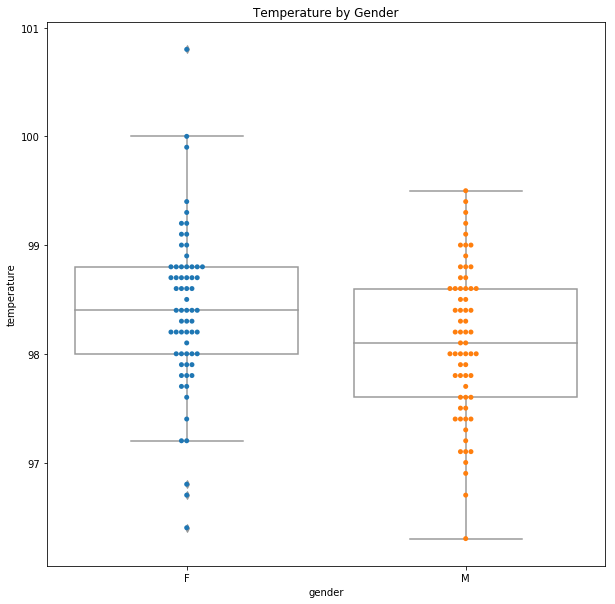

In [59]:
_ = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='gender', y='temperature', data= df, color='white')
ax = sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.title('Temperature by Gender')

There appears to be a small difference, but let's see if it's significant

In [61]:
df_female = df[df.gender=='F']
df_male = df[df.gender=='M']
print(df_female.shape)
print(df_male.shape)

(65, 3)
(65, 3)


We'll carry out a two-sample one-sided t-test. 

The null hypothesis is that the mean body temperature for females, $\mu_f$, and the mean body temperature for males, $\mu_m$, are equal. That is, $\mu_f = \mu_m$. 

The alternative hypothesis is that $\mu_f >\mu_m$. 

In [64]:
# The samples are independent. 
two_sided_t_mf = scipy.stats.ttest_ind(df_female.temperature, df_male.temperature)

In [66]:
print('p_value: {}'.format(two_sided_t_mf[1]/2))
print('t_statistic: {}'.format(two_sided_t_mf[0]))

p_value: 0.011965941561197804
t_statistic: 2.2854345381656103


We have $p=.012$, so we reject the null hypothesis and accept the alternative hypothesis that $\mu_f> \mu_m$. There is a statistically significant difference in average body temperature between the men and women in this sample. 